In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

pd.options.display.max_rows = 100

In [2]:
train = pd.read_csv('train.csv')

In [3]:
X_train = train.drop(columns=['SalePrice', 'Id'])

In [4]:
y_train=train['SalePrice']

In [5]:
enc = TargetEncoder()
scaler = StandardScaler()

In [6]:
cat_cols = X_train.select_dtypes(include=['object']).columns

In [7]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', TargetEncoder(target_type='continuous'), cat_cols)
    ],
    remainder='passthrough'
)

In [8]:
X_train_transformed = preprocessor.fit_transform(X_train, y_train)

In [9]:
# Assuming all categorical columns are transformed and numerical columns are passed through
transformed_col_names = [f'{col}_encoded' for col in cat_cols] + [col for col in X_train.columns if col not in cat_cols]

# Convert the transformed array back to a DataFrame
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=transformed_col_names, index=X_train.index)

In [18]:
X_train_transformed_df.columns

Index(['MSZoning_encoded', 'Street_encoded', 'Alley_encoded',
       'LotShape_encoded', 'LandContour_encoded', 'Utilities_encoded',
       'LotConfig_encoded', 'LandSlope_encoded', 'Neighborhood_encoded',
       'Condition1_encoded', 'Condition2_encoded', 'BldgType_encoded',
       'HouseStyle_encoded', 'RoofStyle_encoded', 'RoofMatl_encoded',
       'Exterior1st_encoded', 'Exterior2nd_encoded', 'MasVnrType_encoded',
       'ExterQual_encoded', 'ExterCond_encoded', 'Foundation_encoded',
       'BsmtQual_encoded', 'BsmtCond_encoded', 'BsmtExposure_encoded',
       'BsmtFinType1_encoded', 'BsmtFinType2_encoded', 'Heating_encoded',
       'HeatingQC_encoded', 'CentralAir_encoded', 'Electrical_encoded',
       'KitchenQual_encoded', 'Functional_encoded', 'FireplaceQu_encoded',
       'GarageType_encoded', 'GarageFinish_encoded', 'GarageQual_encoded',
       'GarageCond_encoded', 'PavedDrive_encoded', 'PoolQC_encoded',
       'Fence_encoded', 'MiscFeature_encoded', 'SaleType_encoded',
    

In [11]:
matrix = abs(X_train_transformed_df.cov())

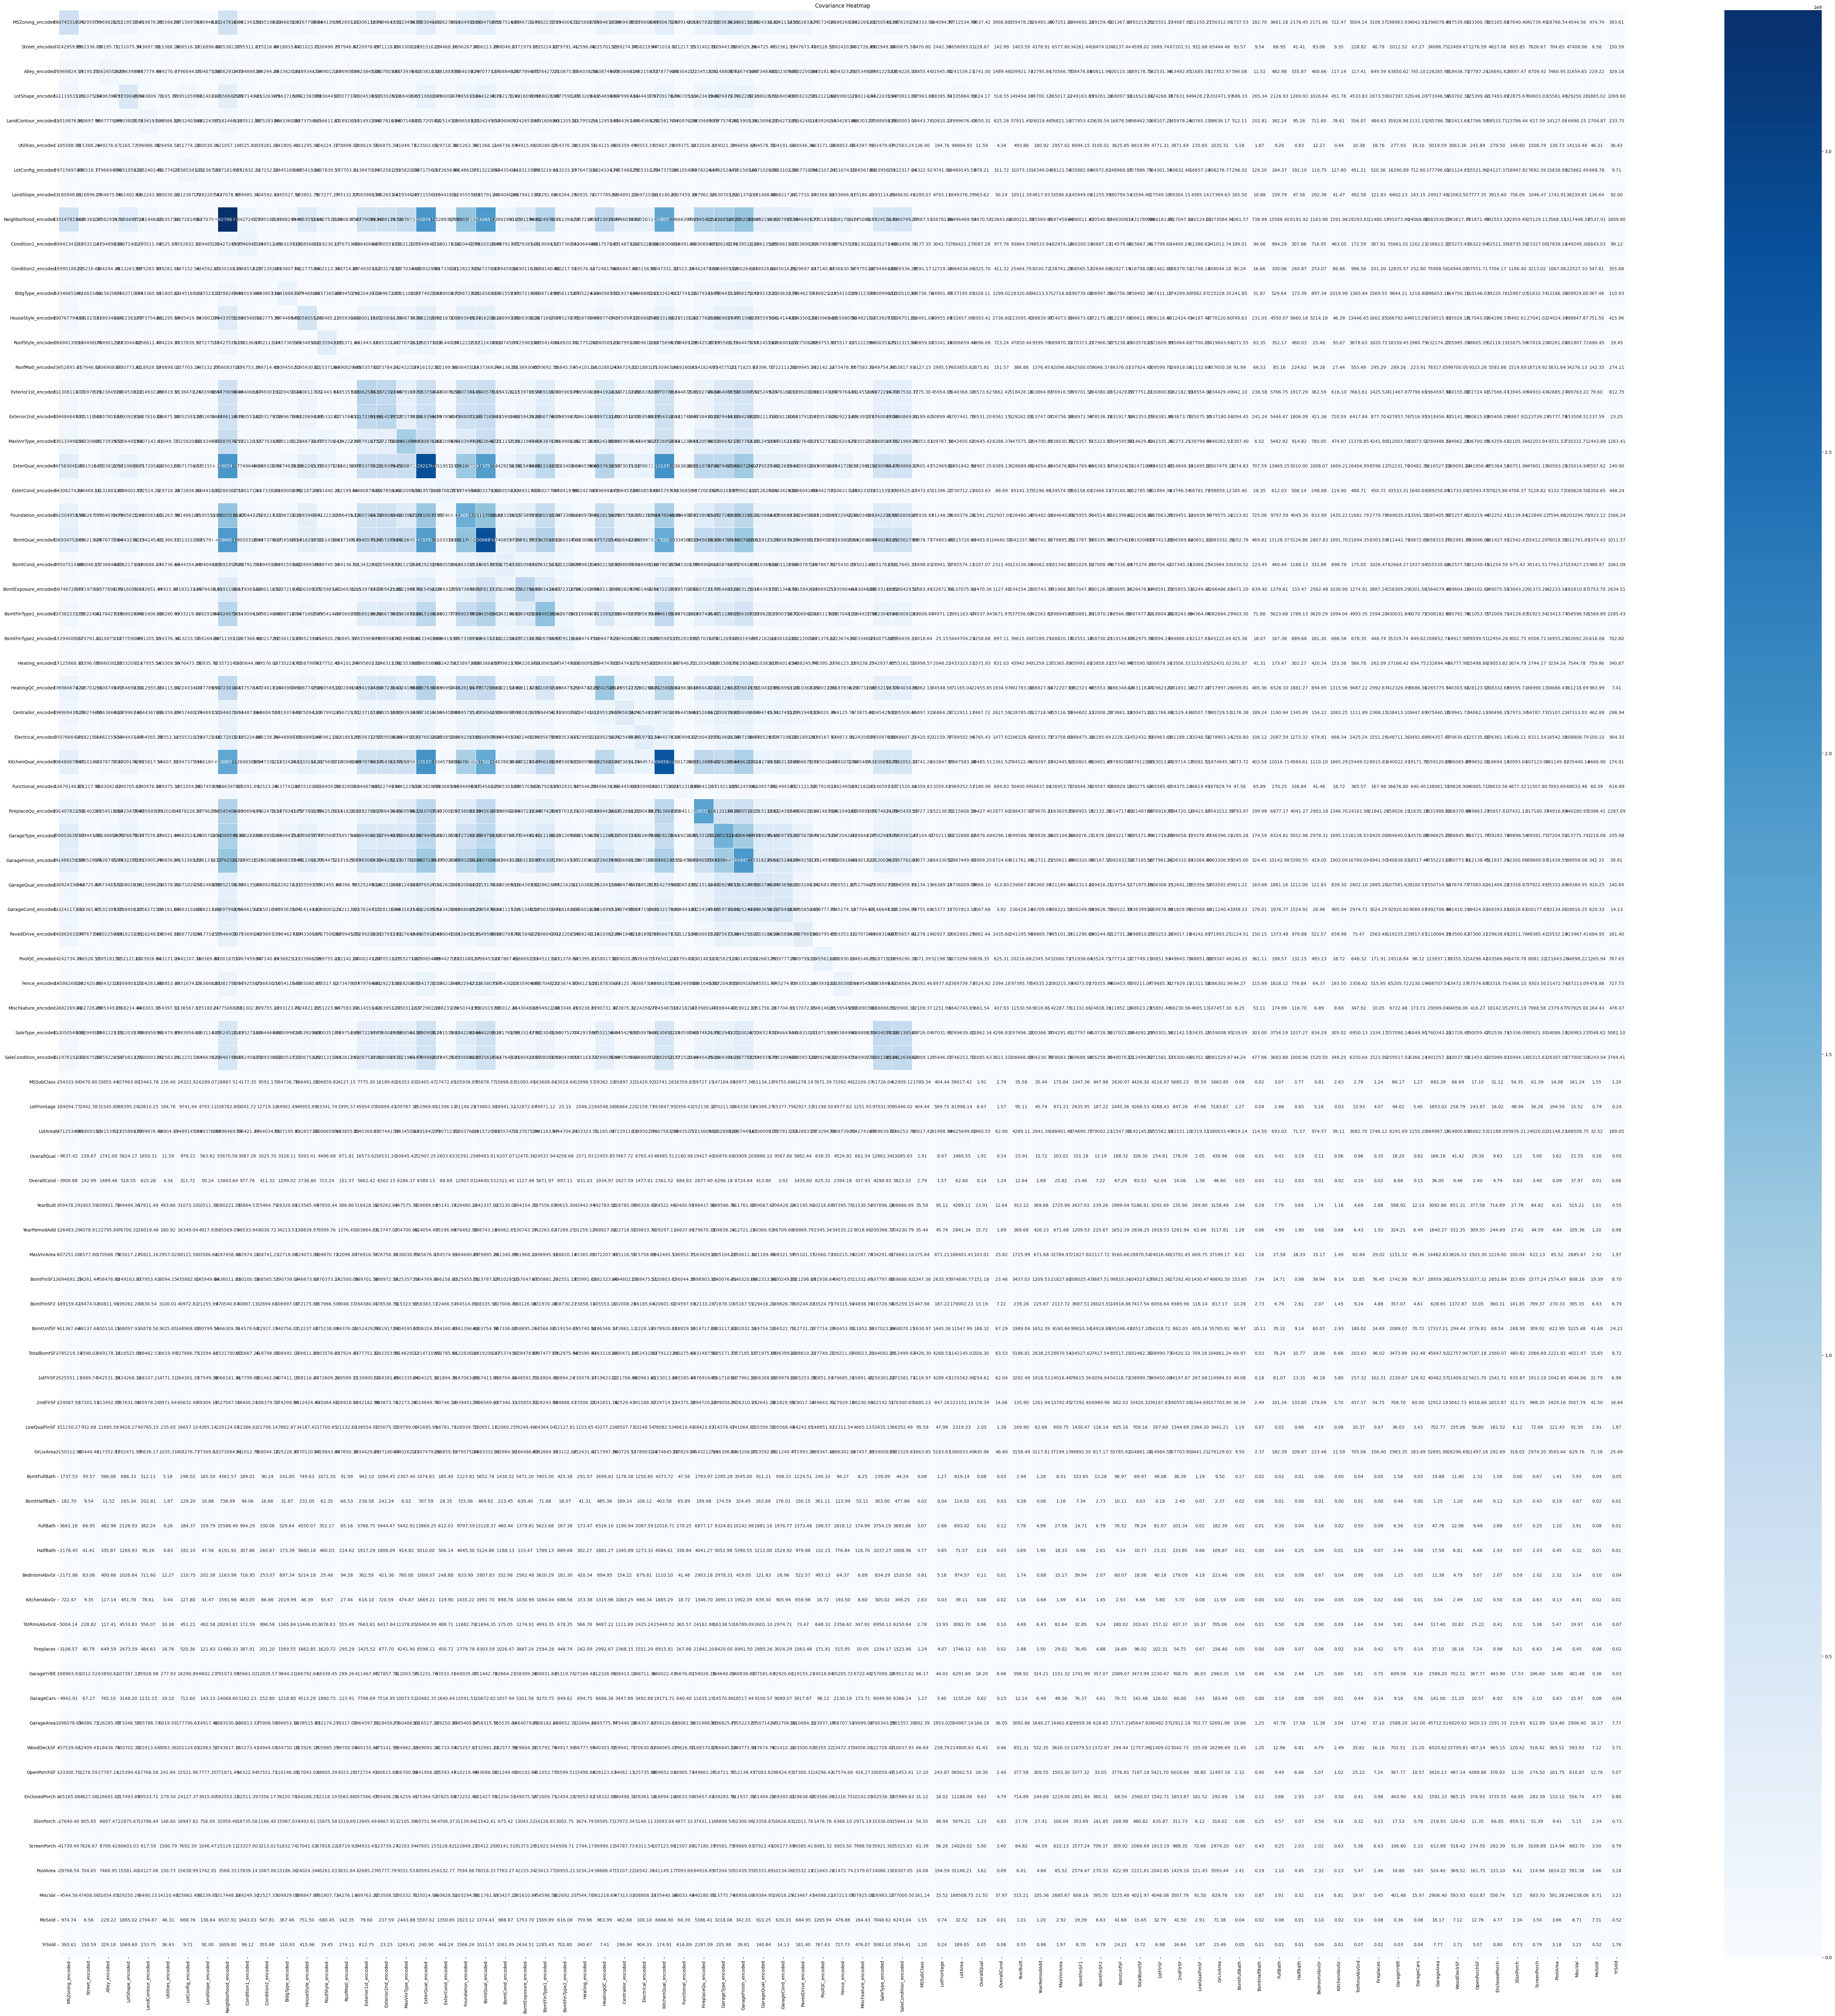

In [12]:
plt.figure(figsize=(80,80))

sns.heatmap(matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Covariance Heatmap')
plt.show()